##Data Visualizations 

Before getting into any text analysis, I wanted to do some data visualizations to answer some basic questions about the data. For example: 
- [How many tweets did I collect per minute over the course of the game?](#tweetcount)
- [What were the most popular products that the users tweeted from?](#tweetsource) 
- [How many users provided their location information?](#tweetlocation_howmany)
- [If location information was available, where were most of the users located?](#tweetlocation)
- [What were the most frequently tweeted words?](#wordcloud)

In [4]:
#Imports
import pandas as pd
from pandas import DataFrame, Series
from pandas.tseries.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
import json

import matplotlib.pyplot as plt
%matplotlib inline 

from IPython.display import HTML
import folium
from wordcloud import WordCloud, STOPWORDS

from scipy.misc import imread

import nltk

In [5]:
path = 'rockets.json'
record = [json.loads(line) for line in open(path)]
rockets = DataFrame(record)
rockets.head()

,_id,created_at,geo,source,text
0,{'$oid': '555e7c38311e9d08bb45c086'},{'$date': 1432255544000},None,Instagram,Getting ready for Game 2 Rockets vs. Warriors ...
1,{'$oid': '555e7c3b311e9d08bb45c087'},{'$date': 1432255545000},None,Twitter for Android,"RT @iamC_Mart: If Lil B curse James Harden, it..."
2,{'$oid': '555e7c3b311e9d08bb45c088'},{'$date': 1432255546000},None,Twitter for iPhone,Tonight's free pick: \n\nHouston Rockets +10.5...
3,{'$oid': '555e7c3b311e9d08bb45c089'},{'$date': 1432255546000},None,Tweetbot for iΟS,Let’s go Rockets!!
4,{'$oid': '555e7c3b311e9d08bb45c08a'},{'$date': 1432255546000},None,Twitter for iPhone,rockets boutta win game 2


In [6]:
created_at = pd.read_csv('rockets_datetime.csv', header = 0) 
created_at.head()

,created_at
0,2015-05-22T00:45:44Z
1,2015-05-22T00:45:45Z
2,2015-05-22T00:45:46Z
3,2015-05-22T00:45:46Z
4,2015-05-22T00:45:46Z


In [7]:
rockets['datetime'] = created_at
rockets.drop(['created_at','_id'], inplace=True, axis=1)
rockets['datetime'] = pd.to_datetime(pd.Series(rockets['datetime']))
rockets.set_index('datetime', drop=False, inplace=True)
rockets.index = rockets.index.tz_localize('UTC').tz_convert('EST')
rockets.index = rockets.index - DateOffset(hours = 12)
rockets.index
rockets.head()

,geo,source,text,datetime
2015-05-21 07:45:44-05:00,None,Instagram,Getting ready for Game 2 Rockets vs. Warriors ...,2015-05-22 00:45:44
2015-05-21 07:45:45-05:00,None,Twitter for Android,"RT @iamC_Mart: If Lil B curse James Harden, it...",2015-05-22 00:45:45
2015-05-21 07:45:46-05:00,None,Twitter for iPhone,Tonight's free pick: \n\nHouston Rockets +10.5...,2015-05-22 00:45:46
2015-05-21 07:45:46-05:00,None,Tweetbot for iΟS,Let’s go Rockets!!,2015-05-22 00:45:46
2015-05-21 07:45:46-05:00,None,Twitter for iPhone,rockets boutta win game 2,2015-05-22 00:45:46


In [8]:
rockets1m = rockets['datetime'].resample('1t', how='count')
rockets1m.index = rockets1m.index.tz_convert('EST')

550.953125


<a id= 'tweetcount'></a>
###How many tweets did I collect per minute over the course of the game?

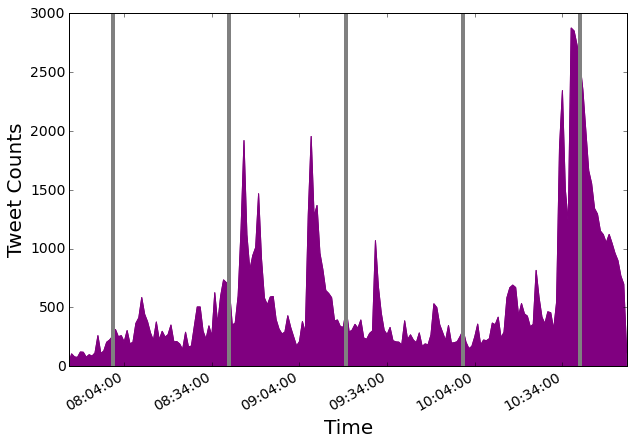

In [9]:
avg = rockets1m.mean()
print (avg) 

fig, ax = plt.subplots()
#rockets1m.index = rockets1m.index.tz_convert('EST')
rockets1m.plot(legend=False,figsize=(10,7), kind = 'area', color = 'purple')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Time',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Counts',fontsize=20,family='sans-serif')
# Now add the start and end markers for each quarter
plt.axvline(x='2015-05-21 08:00:00-05:00', linewidth=4, color='grey')
plt.axvline(x='2015-05-21 08:40:00-05:00', linewidth=4, color='grey')
plt.axvline(x='2015-05-21 09:20:00-05:00', linewidth=4, color='grey')
plt.axvline(x='2015-05-21 10:00:00-05:00', linewidth=4, color='grey')
plt.axvline(x='2015-05-21 10:40:00-05:00', linewidth=4, color='grey')
plt.grid(False)
plt.show()

In [10]:
source_counts = rockets.source.value_counts()
source_counts_max = source_counts[0:5]

<a id= 'tweetsource'></a>
###What were the top 5 products that the users tweeted from?

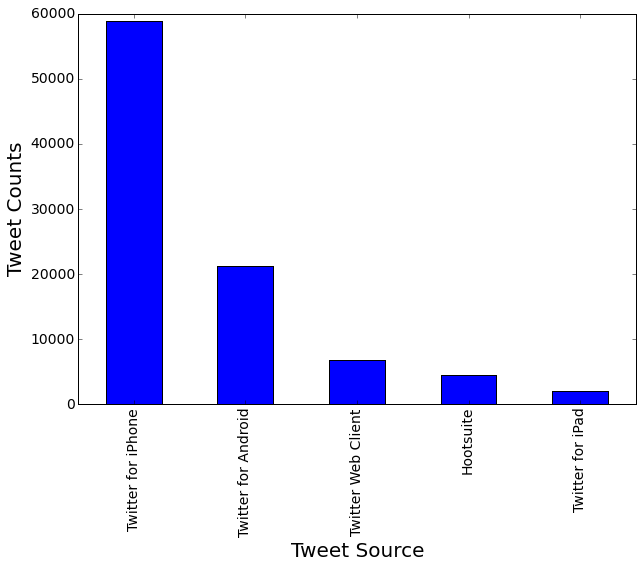

In [20]:
fig, ax = plt.subplots()
source_counts_max.plot(legend=False,figsize=(10,7), kind = 'bar')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Tweet Source',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Counts',fontsize=20,family='sans-serif')
plt.grid(False)
plt.show()

<a id= 'tweetlocation_howmany'></a>
###How many users provided their location information?(#tweetlocation_howmany)

In [12]:
geo = pd.read_csv('rockets_geo.csv', header = False, dtype = float, delimiter = ',')
geo.head()

,latitude,longitude
0,33.921442,-118.326652
1,29.791573,-95.584474
2,29.972518,-92.115556
3,37.750265,-122.202902
4,29.730970,-95.425696


In [13]:
geo.shape

(445, 2)

<a id= 'tweetlocation'></a>
###Where were most of the users located?

In [14]:
def latlong(geo):
    latitude,longitude = geo
    return latitude, longitude

geo['latlong_tuple']= geo[['latitude','longitude']].apply(latlong, axis=1)

In [15]:
def inline_map(map):
    #Embeds the HTML source of the map directly into the IPython notebook.
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    #Embeds a linked iframe to the map into the IPython notebook.
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

In [16]:
map = folium.Map(location=[40, -99], zoom_start=4)

for latlong in geo['latlong_tuple']:
    map.circle_marker(latlong, popup_on=False, radius=25,
                  line_color='red',fill_color='red', fill_opacity=0.2)
inline_map(map)

<a id= 'wordcloud'></a>
###What were the most frequently tweeted words?

In [17]:
clean_tweets = pd.read_csv('rockets_cleantext.csv',header = False)

/Users/Deepna/anaconda/lib/python3.4/site-packages/wordcloud/wordcloud.py:236: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


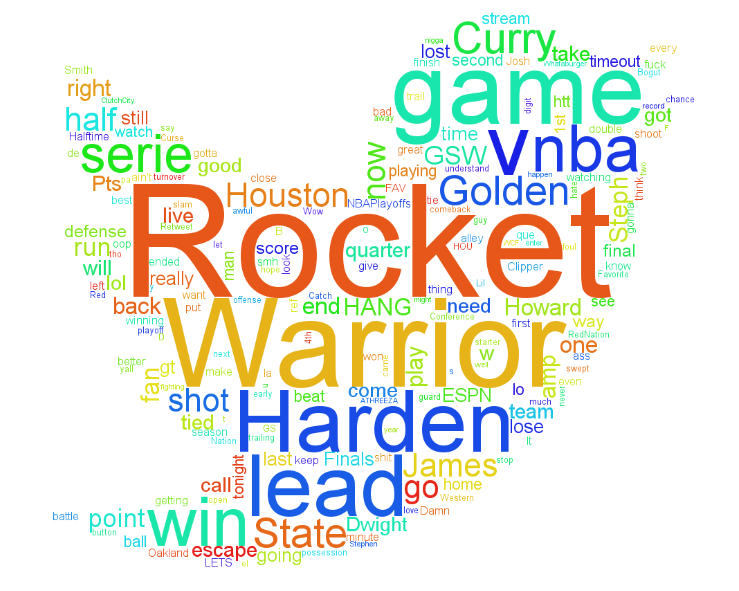

In [18]:
# join tweets to a single string
words = ' '.join(rockets['text'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
twitter_mask = imread('/Users/Deepna/Pictures/twitter_mask.png', flatten=True)

plt.figure(num=None, figsize=(15, 10), dpi=300)
wordcloud = WordCloud(
                      font_path='/Library/Fonts/Arial.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud_2.png', dpi=300)
plt.show()

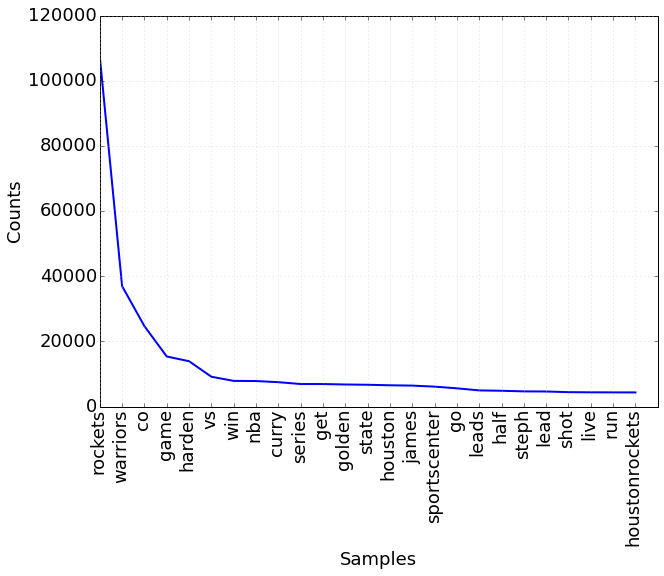

In [19]:
# Tokenize into words
tokens = []
for tweet in clean_tweets['CleanText']:
    for word in nltk.word_tokenize(tweet):
        tokens.append(word)
tokens[:10]
freq_dist = nltk.FreqDist(tokens)
plt.figure(num=None, figsize=(10, 7), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
freq_dist.plot(25)